In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
df=pd.read_csv(r"D:\SEM-5\ML-LAB\ex2\Rice_MSC_Ds.csv")
df

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,ALLdaub4L,ALLdaub4a,ALLdaub4b,ALLdaub4Y,ALLdaub4Cb,ALLdaub4Cr,ALLdaub4XX,ALLdaub4YY,ALLdaub4ZZ,CLASS
0,7805,437.915,209.8215,48.0221,0.9735,99.6877,0.9775,7985,0.3547,4.3693,...,113.9924,65.0610,59.5989,104.8552,67.8779,63.0828,0.3673,0.3793,0.4733,Basmati
1,7503,340.757,138.3361,69.8417,0.8632,97.7400,0.9660,7767,0.6637,1.9807,...,105.7055,64.3685,62.2084,96.8375,65.5371,63.5832,0.3014,0.3144,0.3641,Arborio
2,5124,314.617,141.9803,46.5784,0.9447,80.7718,0.9721,5271,0.4760,3.0482,...,109.7155,62.6423,58.7439,100.2352,68.9753,59.8342,0.3233,0.3445,0.4448,Jasmine
3,7990,437.085,201.4386,51.2245,0.9671,100.8622,0.9659,8272,0.6274,3.9325,...,116.5405,64.9069,60.2562,107.2560,67.3298,63.2237,0.3880,0.4020,0.4904,Basmati
4,7433,342.893,140.3350,68.3927,0.8732,97.2830,0.9831,7561,0.6006,2.0519,...,107.7502,64.7071,61.3549,98.8704,66.2048,63.5378,0.3184,0.3303,0.3928,Arborio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,5551,285.911,114.1695,62.9079,0.8345,84.0699,0.9846,5638,0.6418,1.8149,...,103.9529,64.9225,62.4355,95.2780,65.5114,64.4457,0.2895,0.2997,0.3455,Arborio
74996,7696,322.703,121.3900,81.1375,0.7438,98.9892,0.9868,7799,0.7309,1.4961,...,108.9778,65.4571,59.9502,100.2301,67.5089,63.6028,0.3335,0.3426,0.4257,Karacadag
74997,7579,339.295,136.3125,71.2866,0.8524,98.2338,0.9805,7730,0.6399,1.9122,...,106.0881,64.1869,61.3876,97.1585,66.2445,63.0596,0.3028,0.3164,0.3761,Arborio
74998,15174,489.502,200.9486,97.6282,0.8740,138.9969,0.9766,15537,0.7903,2.0583,...,119.2037,63.3545,64.8200,109.3027,63.3122,63.5967,0.3970,0.4215,0.4469,Ipsala


In [3]:
for i in df.columns:
    if((df[i].isnull().sum())!=0):
        print(i,df[i].isnull().sum())
    

skewB 6
kurtosisB 6
skewCb 3
skewCr 2
kurtosisCb 3
kurtosisCr 2


In [4]:
#Replace the null values
df['skewCb']=df['skewCb'].fillna(df['skewCb'].mean())
df['skewCr']=df['skewCr'].fillna(df['skewCr'].mean())
df['kurtosisCb']=df['kurtosisCb'].fillna(df['kurtosisCb'].mean())
df['kurtosisCr']=df['kurtosisCr'].fillna(df['kurtosisCr'].median())
df['skewB']=df['skewB'].fillna(df['skewB'].mean())
df['kurtosisB']=df['kurtosisB'].fillna(df['kurtosisB'].mean())

In [5]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
arr=ms.fit_transform(df.iloc[:,:-1])
arr

array([[0.2267993 , 0.53170223, 0.71120483, ..., 0.68244576, 0.65801001,
        0.83185579],
       [0.20912815, 0.2396365 , 0.26070133, ..., 0.46581197, 0.45494368,
        0.50916076],
       [0.06992393, 0.1610573 , 0.2836672 , ..., 0.53780408, 0.5491239 ,
        0.74763593],
       ...,
       [0.21357519, 0.2352416 , 0.24794853, ..., 0.4704142 , 0.4612015 ,
        0.54462175],
       [0.65798713, 0.68677741, 0.6552875 , ..., 0.7800789 , 0.79005006,
        0.75384161],
       [0.52674078, 0.57595188, 0.55801685, ..., 0.84319527, 0.85231539,
        0.80023641]])

In [6]:
cols=df.columns[:-1]
df1=pd.DataFrame(arr,columns=list(cols))
df1
df1['CLASS']=df['CLASS']
df1

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,ALLdaub4L,ALLdaub4a,ALLdaub4b,ALLdaub4Y,ALLdaub4Cb,ALLdaub4Cr,ALLdaub4XX,ALLdaub4YY,ALLdaub4ZZ,CLASS
0,0.226799,0.531702,0.711205,0.169473,0.962963,0.311846,0.872600,0.224590,0.121849,0.630194,...,0.720850,0.711817,0.357488,0.721816,0.632684,0.623320,0.682446,0.658010,0.831856,Basmati
1,0.209128,0.239637,0.260701,0.446484,0.655806,0.290872,0.772251,0.212204,0.617916,0.142227,...,0.532359,0.628595,0.514402,0.526717,0.477674,0.677856,0.465812,0.454944,0.509161,Arborio
2,0.069924,0.161057,0.283667,0.151145,0.882762,0.108149,0.825480,0.070394,0.316584,0.360306,...,0.623569,0.421146,0.306076,0.609395,0.705355,0.269276,0.537804,0.549124,0.747636,Jasmine
3,0.237624,0.529207,0.658375,0.210129,0.945141,0.324494,0.771379,0.240895,0.559640,0.540960,...,0.778808,0.693298,0.397013,0.780236,0.596388,0.638676,0.750493,0.729036,0.882388,Basmati
4,0.205032,0.246058,0.273298,0.428088,0.683654,0.285951,0.921466,0.200500,0.516616,0.156772,...,0.578867,0.669287,0.463079,0.576185,0.521889,0.672908,0.521696,0.504693,0.593972,Arborio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,0.094909,0.074764,0.108403,0.358456,0.575884,0.143665,0.934555,0.091245,0.582758,0.108355,...,0.492495,0.695173,0.528057,0.488769,0.475972,0.771854,0.426693,0.408949,0.454196,Arborio
74996,0.220421,0.185365,0.153906,0.589890,0.323308,0.304324,0.953752,0.214022,0.725799,0.043228,...,0.606790,0.759419,0.378612,0.609271,0.608249,0.679992,0.571335,0.543179,0.691194,Karacadag
74997,0.213575,0.235242,0.247949,0.464828,0.625731,0.296190,0.898778,0.210102,0.579708,0.128233,...,0.541062,0.606771,0.465046,0.534528,0.524518,0.620792,0.470414,0.461202,0.544622,Arborio
74998,0.657987,0.686777,0.655288,0.799247,0.685881,0.735150,0.864747,0.653656,0.821159,0.158080,...,0.839384,0.506736,0.671441,0.830040,0.330338,0.679327,0.780079,0.790050,0.753842,Ipsala


In [7]:
x=df1.iloc[:,:-1]
y=df['CLASS']

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
print(x_train.shape)
print(x_test.shape)

(56250, 106)
(18750, 106)


In [9]:
mlp=MLPClassifier(hidden_layer_sizes=(5,10,5),activation="relu",random_state=42)
mlp.fit(x_train,y_train)
mlp.

MLPClassifier(hidden_layer_sizes=(5, 10, 5), random_state=42)

In [10]:
y_pred=mlp.predict(x_test)
print("Test accuracy",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Test accuracy 0.99696
              precision    recall  f1-score   support

     Arborio       1.00      1.00      1.00      3752
     Basmati       1.00      0.99      1.00      3780
      Ipsala       1.00      1.00      1.00      3793
     Jasmine       0.99      1.00      0.99      3695
   Karacadag       1.00      1.00      1.00      3730

    accuracy                           1.00     18750
   macro avg       1.00      1.00      1.00     18750
weighted avg       1.00      1.00      1.00     18750



In [11]:
t_pred=mlp.predict(x_train)
print("Test accuracy",accuracy_score(y_train,t_pred))
print(classification_report(y_train,t_pred))

Test accuracy 0.9980622222222222
              precision    recall  f1-score   support

     Arborio       1.00      1.00      1.00     11248
     Basmati       1.00      1.00      1.00     11220
      Ipsala       1.00      1.00      1.00     11207
     Jasmine       0.99      1.00      1.00     11305
   Karacadag       1.00      1.00      1.00     11270

    accuracy                           1.00     56250
   macro avg       1.00      1.00      1.00     56250
weighted avg       1.00      1.00      1.00     56250



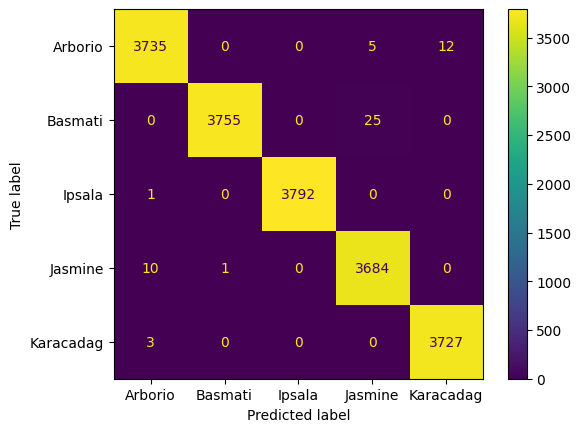

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
c1=confusion_matrix(y_true=y_test,y_pred=y_pred)
c1
disp = ConfusionMatrixDisplay(confusion_matrix=c1,display_labels=mlp.classes_)
disp.plot()

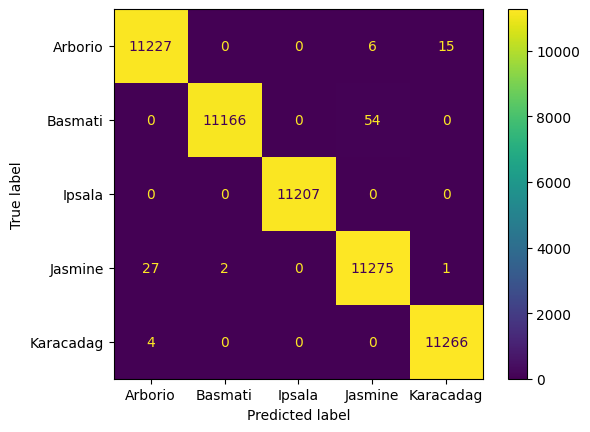

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
c2=confusion_matrix(y_true=y_train,y_pred=t_pred)
c2
disp = ConfusionMatrixDisplay(confusion_matrix=c2,display_labels=mlp.classes_)
disp.plot()